In [ ]:
!pip install plantcv==3.14.2
!pip install gradio==4.18.0
!pip install ultralytics
!pip install -i https://test.pypi.org/simple/ plant-analysis-AVLL==0.0.10

# !unzip workshop_material.zip

In [ ]:
import plant_analysis_AVLL
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from itertools import product

In [ ]:
# make an object and update some variables
plant_analysis = plant_analysis_AVLL.Plant_Analysis()
plant_analysis.update_service_type(service=0)
plant_analysis.update_input_path(input_path = 'DATA')
plant_analysis.update_check_RI_option(True)
plant_analysis.update_check_CI_option(True)

In [ ]:
def tile(image, d=2):

  w, h = image.size
  grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
  boxes = []

  for i, j in grid:
      box = (j, i, j+d, i+d)
      boxes.append(box)

  return boxes


In [ ]:
raw_image = plant_analysis.plants['Cotton_1']['raw_images'][0][0]

In [ ]:
size = raw_image.size[0] // 2
slices = tile(image = raw_image, d = size)
index = 0
image_stack = np.zeros((size, size, len(slices)))

for box in slices:

    image_stack[:, :, index] = np.array(raw_image.crop(box))
    index += 1

red = np.expand_dims(image_stack[:, :, 1], axis=-1)
green = np.expand_dims(image_stack[:, :, 0], axis=-1)
red_edge = np.expand_dims(image_stack[:, :, 2], axis=-1)
NIR = np.expand_dims(image_stack[:, :, -1], axis=-1)

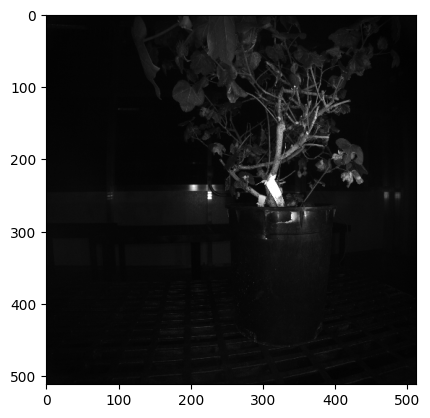

In [ ]:
plt.imshow(red,cmap = 'gray')
plt.show()

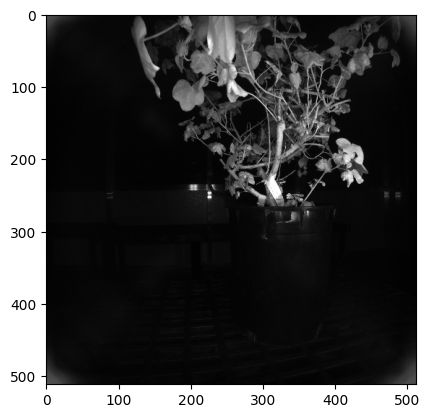

In [ ]:
plt.imshow(NIR,cmap = 'gray')
plt.show()

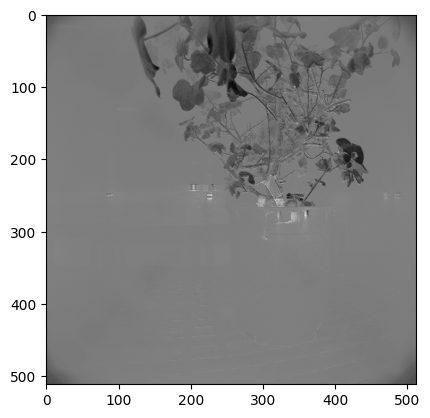

In [ ]:
plt.imshow((red-NIR),cmap = 'gray')
plt.show()

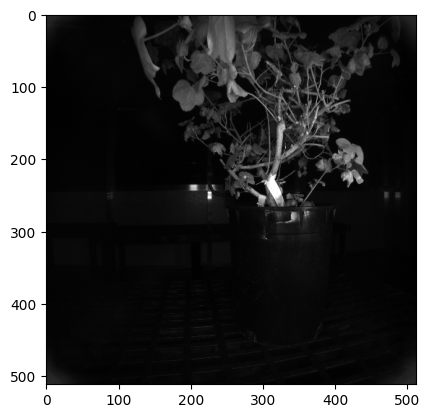

In [ ]:
plt.imshow((red+NIR),cmap = 'gray')
plt.show()

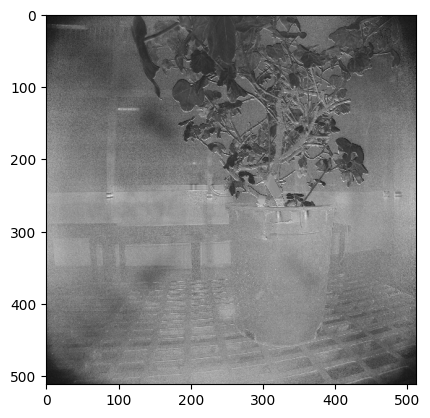

In [ ]:
plt.imshow((red-NIR)/(red+NIR),cmap = 'gray')
plt.show()